# 데이터전처리

In [2]:
import pandas as pd
import os

In [3]:
dirpath = 'rawfiles'
os.listdir(dirpath)

['.DS_Store',
 'CARD_SUBWAY_MONTH_201903.csv',
 'CARD_SUBWAY_MONTH_201902.csv',
 'CARD_SUBWAY_MONTH_201901.csv',
 'CARD_SUBWAY_MONTH_201905.csv',
 'CARD_SUBWAY_MONTH_201904.csv',
 'CARD_SUBWAY_MONTH_201906.csv',
 '.ipynb_checkpoints']

In [4]:
dirpath = './rawfiles/'
files = os.listdir(dirpath)
files.pop(0)
files.pop(-1)
files

['CARD_SUBWAY_MONTH_201903.csv',
 'CARD_SUBWAY_MONTH_201902.csv',
 'CARD_SUBWAY_MONTH_201901.csv',
 'CARD_SUBWAY_MONTH_201905.csv',
 'CARD_SUBWAY_MONTH_201904.csv',
 'CARD_SUBWAY_MONTH_201906.csv']

In [5]:
# 여러개의 파일 병합

raw = pd.DataFrame()

for file in files:
    temp = pd.read_csv(dirpath + file)
    raw = pd.concat([raw, temp], axis=0)

raw.tail()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
17719,20190630,7호선,마들,6622.0,6116.0,20190703
17720,20190630,4호선,노원,14071.0,14702.0,20190703
17721,20190630,7호선,중계,9516.0,8981.0,20190703
17722,20190630,7호선,하계,11645.0,11121.0,20190703
17723,20190630,6호선,태릉입구,5730.0,5214.0,20190703


In [10]:
raw = raw.reset_index(drop=True)

In [11]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107028 entries, 0 to 107027
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   사용일자    107028 non-null  int64  
 1   노선명     107028 non-null  object 
 2   역명      107028 non-null  object 
 3   승차총승객수  107028 non-null  float64
 4   하차총승객수  107028 non-null  float64
 5   등록일자    107028 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 4.9+ MB


In [12]:
# '사용일자' 타입 int64 -> DateTime 타입으로 변경
raw['사용일자'] = pd.to_datetime(raw['사용일자'], format='%Y%m%d')
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107028 entries, 0 to 107027
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   사용일자    107028 non-null  datetime64[ns]
 1   노선명     107028 non-null  object        
 2   역명      107028 non-null  object        
 3   승차총승객수  107028 non-null  float64       
 4   하차총승객수  107028 non-null  float64       
 5   등록일자    107028 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 4.9+ MB


In [13]:
# 사용일자에 대해서 요일로 변환
raw['요일'] = raw['사용일자'].dt.dayofweek
raw.tail()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
107023,2019-06-30,7호선,마들,6622.0,6116.0,20190703,6
107024,2019-06-30,4호선,노원,14071.0,14702.0,20190703,6
107025,2019-06-30,7호선,중계,9516.0,8981.0,20190703,6
107026,2019-06-30,7호선,하계,11645.0,11121.0,20190703,6
107027,2019-06-30,6호선,태릉입구,5730.0,5214.0,20190703,6


In [14]:
# 숫자 요일을 한글명 요일로 변경
conv = {
    0 : '일',
    1 : '월',
    2 : '화',
    3 : '수',
    4 : '목',
    5 : '금',
    6 : '토'
}
raw['요일'] = raw['요일'].map(conv)

In [15]:
raw.sample(5)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
15907,2019-03-27,3호선,안국,28893.0,30110.0,20190330,화
7932,2019-03-14,분당선,모란,32428.0,33510.0,20190317,수
24306,2019-02-11,3호선,구파발,22554.0,20613.0,20190214,일
94330,2019-06-09,2호선,신촌,463.0,394.0,20190612,토
95186,2019-06-10,7호선,부평구청,14018.0,11117.0,20190613,일


In [16]:
#'연월' 열 
raw['연월'] = raw['사용일자'].dt.strftime('%Y-%m')
raw.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일,연월
0,2019-03-01,4호선,서울역,62588.0,64794.0,20190304,목,2019-03
1,2019-03-01,1호선,신설동,1335.0,1375.0,20190304,목,2019-03
2,2019-03-01,6호선,보문,1208.0,1271.0,20190304,목,2019-03
3,2019-03-01,4호선,성신여대입구,3231.0,3650.0,20190304,목,2019-03
4,2019-03-01,우이신설경전철,정릉,3620.0,2869.0,20190304,목,2019-03


In [17]:
#'월일' 열
raw['월일'] = raw['사용일자'].dt.strftime('%m-%d')
raw.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일,연월,월일
0,2019-03-01,4호선,서울역,62588.0,64794.0,20190304,목,2019-03,03-01
1,2019-03-01,1호선,신설동,1335.0,1375.0,20190304,목,2019-03,03-01
2,2019-03-01,6호선,보문,1208.0,1271.0,20190304,목,2019-03,03-01
3,2019-03-01,4호선,성신여대입구,3231.0,3650.0,20190304,목,2019-03,03-01
4,2019-03-01,우이신설경전철,정릉,3620.0,2869.0,20190304,목,2019-03,03-01


In [19]:
#'승하차총승객수' 열 구하기
raw['승하차총승객수'] = raw['승차총승객수'] + raw['하차총승객수']
raw = raw[['사용일자', '요일', '노선명', '역명', '승차총승객수', '하차총승객수', '승하차총승객수', '연월', '월일', '등록일자' ]]
raw.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
0,2019-03-01,목,4호선,서울역,62588.0,64794.0,127382.0,2019-03,03-01,20190304
1,2019-03-01,목,1호선,신설동,1335.0,1375.0,2710.0,2019-03,03-01,20190304
2,2019-03-01,목,6호선,보문,1208.0,1271.0,2479.0,2019-03,03-01,20190304
3,2019-03-01,목,4호선,성신여대입구,3231.0,3650.0,6881.0,2019-03,03-01,20190304
4,2019-03-01,목,우이신설경전철,정릉,3620.0,2869.0,6489.0,2019-03,03-01,20190304


In [20]:
# 정리한 데이터 저장
fpath = './subway_raw.csv'
raw.to_csv(fpath, index=False, encoding='utf-8-sig')

# 데이터 분석

In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
file1 = r'./subway_raw.csv'
sub = pd.read_csv(file1)
sub.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
0,2019-03-01,목,4호선,서울역,62588.0,64794.0,127382.0,2019-03,03-01,20190304
1,2019-03-01,목,1호선,신설동,1335.0,1375.0,2710.0,2019-03,03-01,20190304
2,2019-03-01,목,6호선,보문,1208.0,1271.0,2479.0,2019-03,03-01,20190304
3,2019-03-01,목,4호선,성신여대입구,3231.0,3650.0,6881.0,2019-03,03-01,20190304
4,2019-03-01,목,우이신설경전철,정릉,3620.0,2869.0,6489.0,2019-03,03-01,20190304


In [26]:
submonth = sub.groupby('연월')[['승하차총승객수']].sum()
submonth

,승하차총승객수
연월,
2019-01,442746389.0
2019-02,379836010.0
2019-03,466692826.0
2019-04,470934348.0
2019-05,485718557.0
2019-06,442210635.0


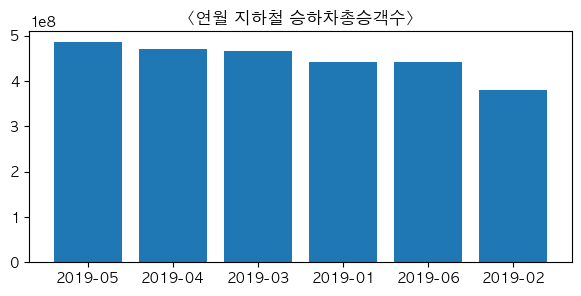

In [27]:
x = np.arange(len(submonth.index))
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(7, 3)) 
plt.bar(x,submonth['승하차총승객수'].sort_values(ascending=False))
plt.xticks(x, submonth['승하차총승객수'].sort_values(ascending=False).index)
plt.title("<연월 지하철 승하차총승객수>")
plt.show()

---
연월로 그룹핑하여, 승하차총승객수의 합을 구했다. <br/>
그래프를 봤을때 승하차총승객수가 최대가 되는 연월은 __'2019-05'__이다.

---

In [28]:
subday = sub.groupby('요일')[['승하차총승객수']].sum()
subday

,승하차총승객수
요일,
금,341950018.0
목,445310717.0
수,428684383.0
월,411979965.0
일,391555551.0
토,247523995.0
화,421134136.0


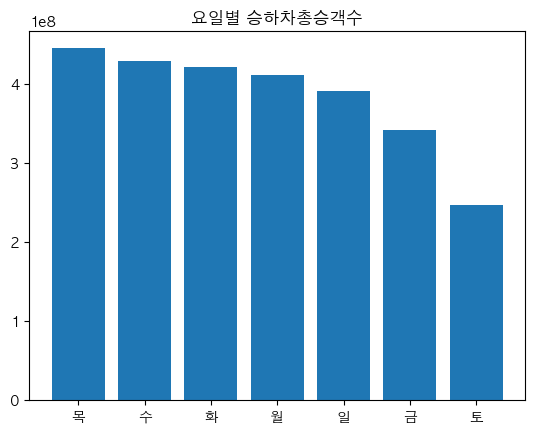

In [29]:
x = [0, 1, 2, 3, 4, 5, 6]
plt.rcParams['font.family'] = 'AppleGothic'
plt.bar(x, subday['승하차총승객수'].sort_values(ascending=False))
plt.xticks(x, subday['승하차총승객수'].sort_values(ascending=False).index)
plt.title('요일별 승하차총승객수')
plt.show()

---
'요일'로 그룹핑하여, 승하차총승객수의 합을 구했다.<br/>
이때 승하차총승객수가 최대가 되는 요일은 __'목'__이다.

---

In [31]:
import seaborn as sns

<AxesSubplot: title={'center': '2019-01 월일별 승하차총승객수'}, xlabel='월일', ylabel='승하차총승객수'>

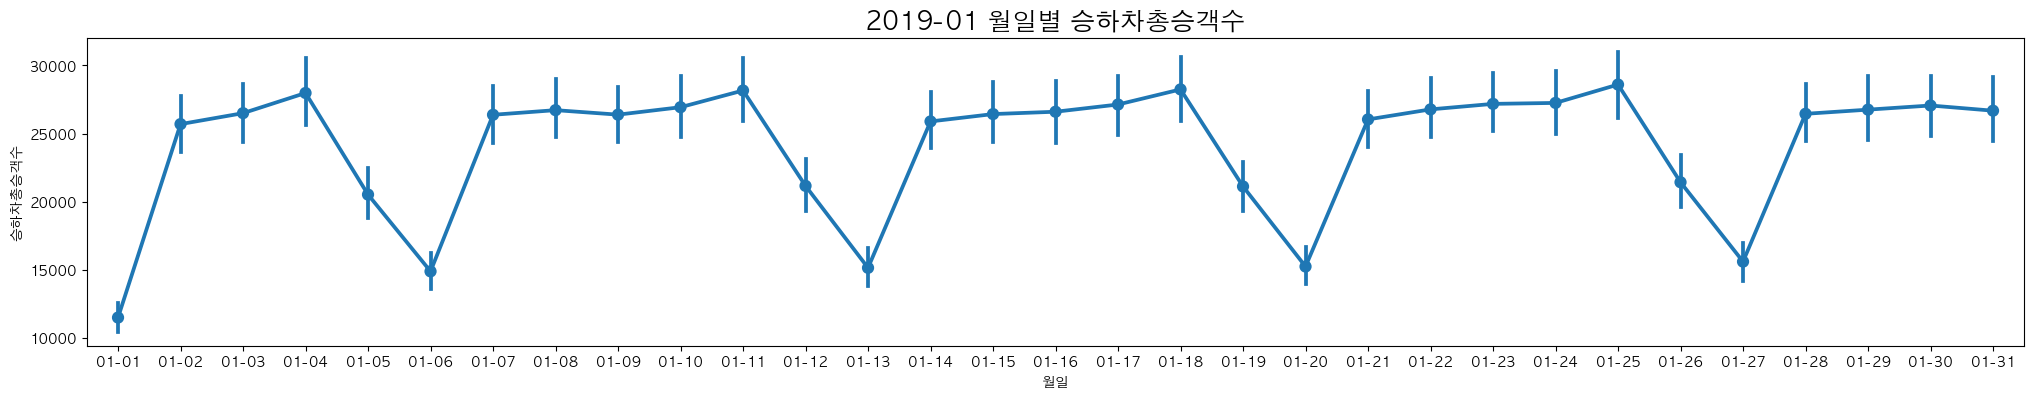

In [32]:
submonth1=sub[sub['연월']=='2019-01']
plt.figure(figsize=(25, 4)) 
plt.rcParams['font.family'] = 'AppleGothic'
plt.title("2019-01 월일별 승하차총승객수", fontsize=18)
sns.pointplot(x='월일', y='승하차총승객수', data=submonth1)

<AxesSubplot: title={'center': '2019-02 월일별 승하차총승객수'}, xlabel='월일', ylabel='승하차총승객수'>

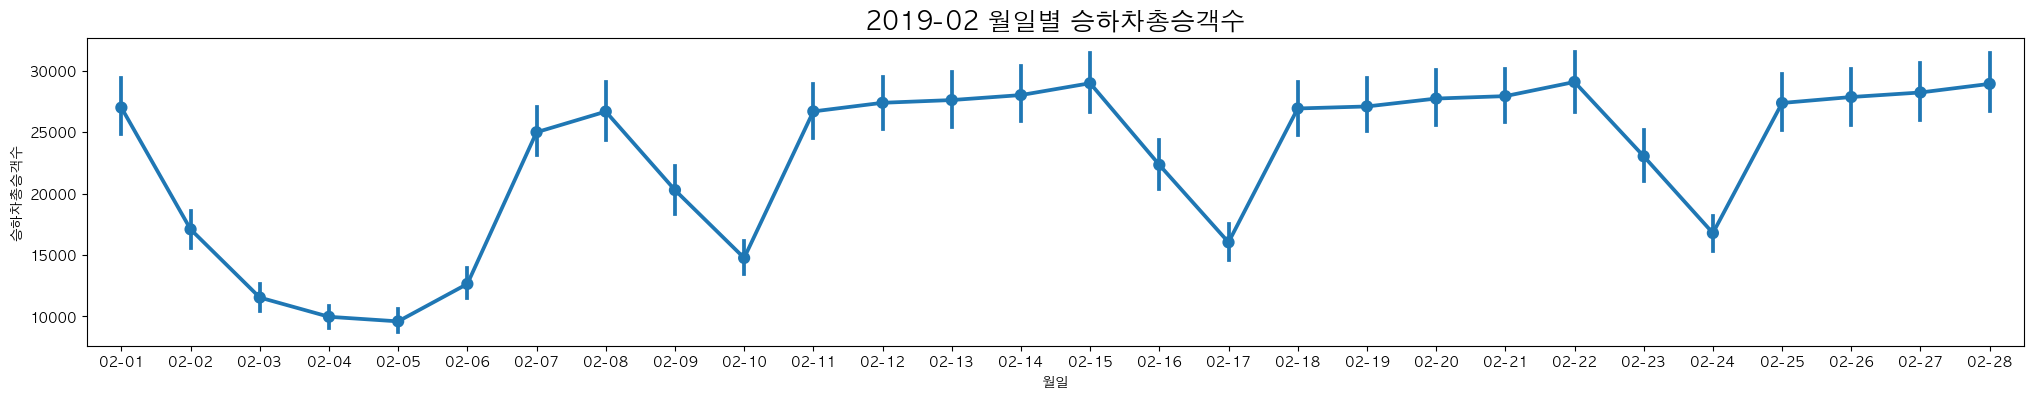

In [33]:
submonth2=sub[sub['연월']=='2019-02']
plt.figure(figsize=(25, 4)) 
plt.rcParams['font.family'] = 'AppleGothic'
plt.title("2019-02 월일별 승하차총승객수", fontsize=18)
sns.pointplot(x='월일', y='승하차총승객수', data=submonth2)

<AxesSubplot: title={'center': '2019-03 월일별 승하차총승객수'}, xlabel='월일', ylabel='승하차총승객수'>

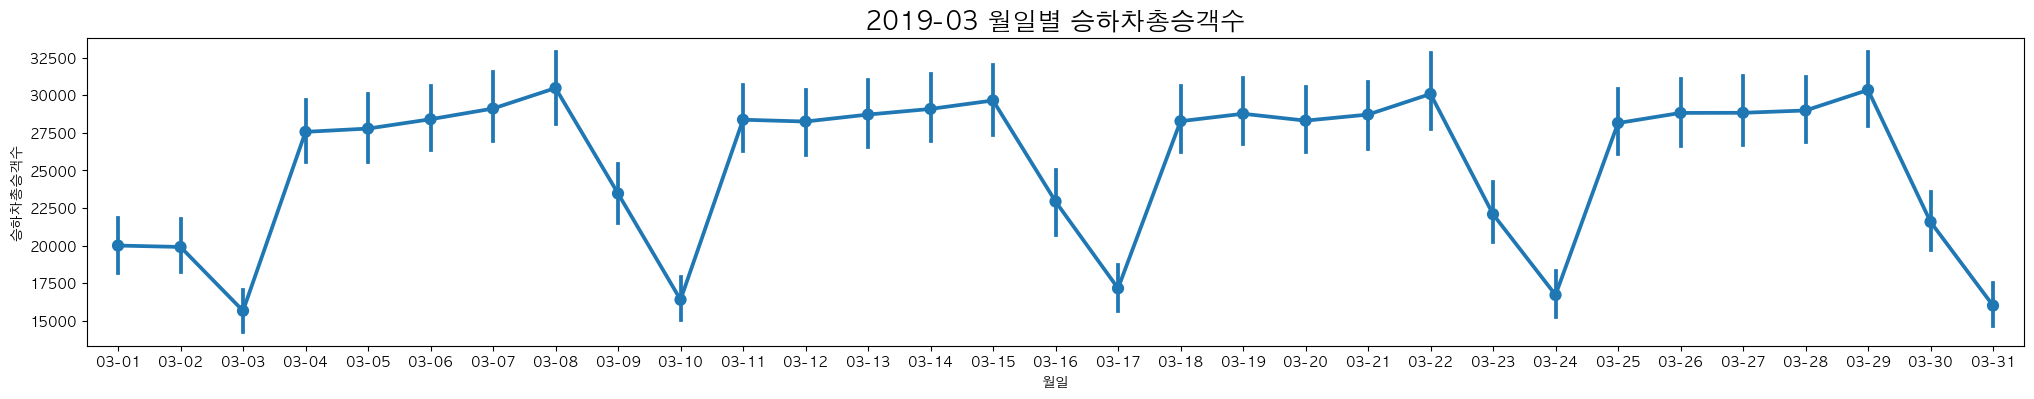

In [34]:
submonth3=sub[sub['연월']=='2019-03']
plt.figure(figsize=(25, 4)) 
plt.rcParams['font.family'] = 'AppleGothic'
plt.title("2019-03 월일별 승하차총승객수", fontsize=18)
sns.pointplot(x='월일', y='승하차총승객수', data=submonth3)

<AxesSubplot: title={'center': '2019-04 월일별 승하차총승객수'}, xlabel='월일', ylabel='승하차총승객수'>

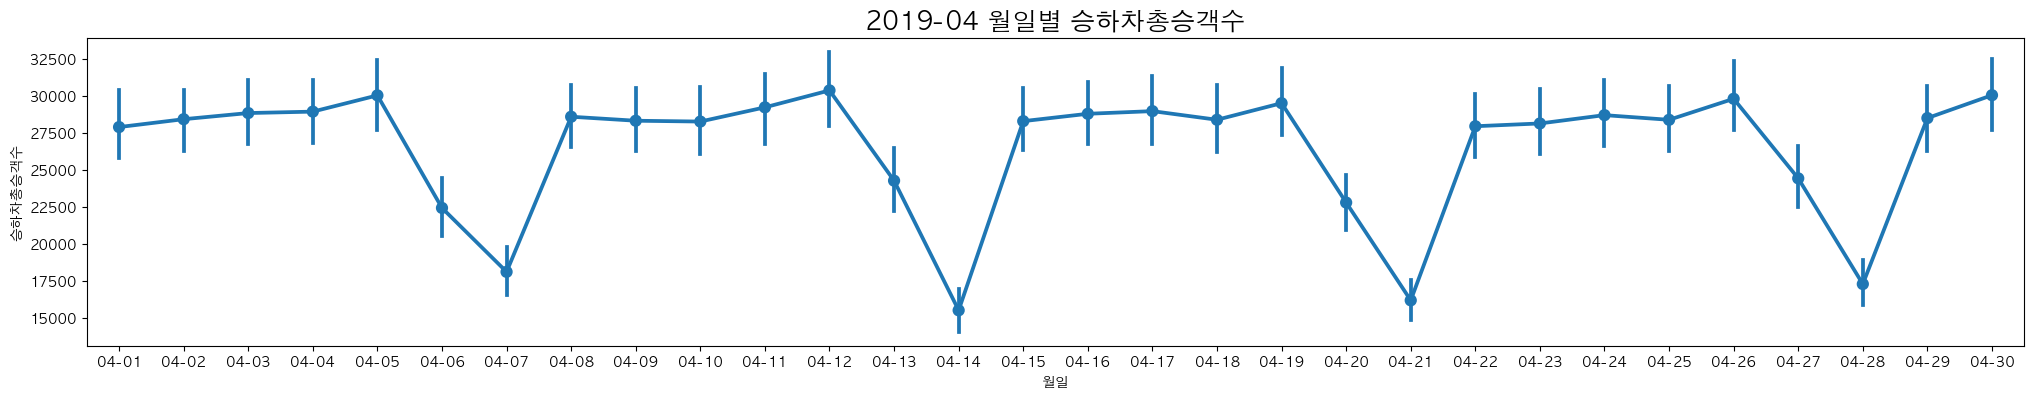

In [35]:
submonth4=sub[sub['연월']=='2019-04']
plt.figure(figsize=(25, 4)) 
plt.rcParams['font.family'] = 'AppleGothic'
plt.title("2019-04 월일별 승하차총승객수", fontsize=18)
sns.pointplot(x='월일', y='승하차총승객수', data=submonth4)

<AxesSubplot: title={'center': '2019-05 월일별 승하차총승객수'}, xlabel='월일', ylabel='승하차총승객수'>

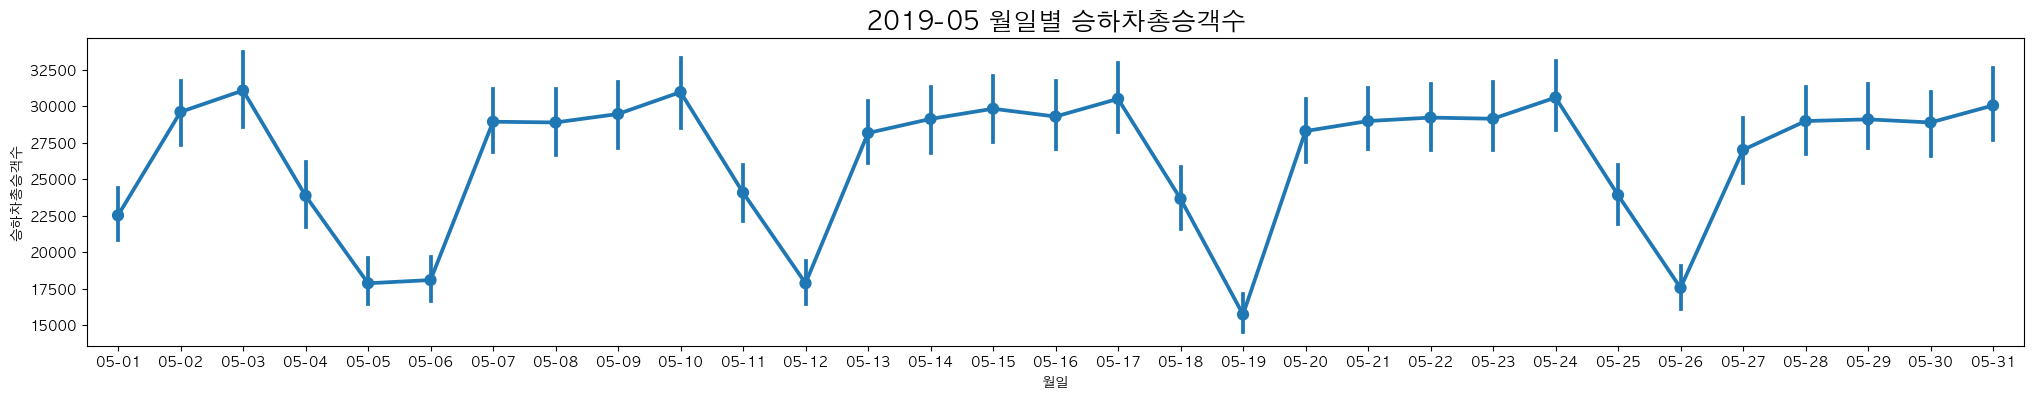

In [36]:
submonth5=sub[sub['연월']=='2019-05']
plt.figure(figsize=(25, 4)) 
plt.rcParams['font.family'] = 'AppleGothic'
plt.title("2019-05 월일별 승하차총승객수", fontsize=18)
sns.pointplot(x='월일', y='승하차총승객수', data=submonth5)

<AxesSubplot: title={'center': '2019-06 월일별 승하차총승객수'}, xlabel='월일', ylabel='승하차총승객수'>

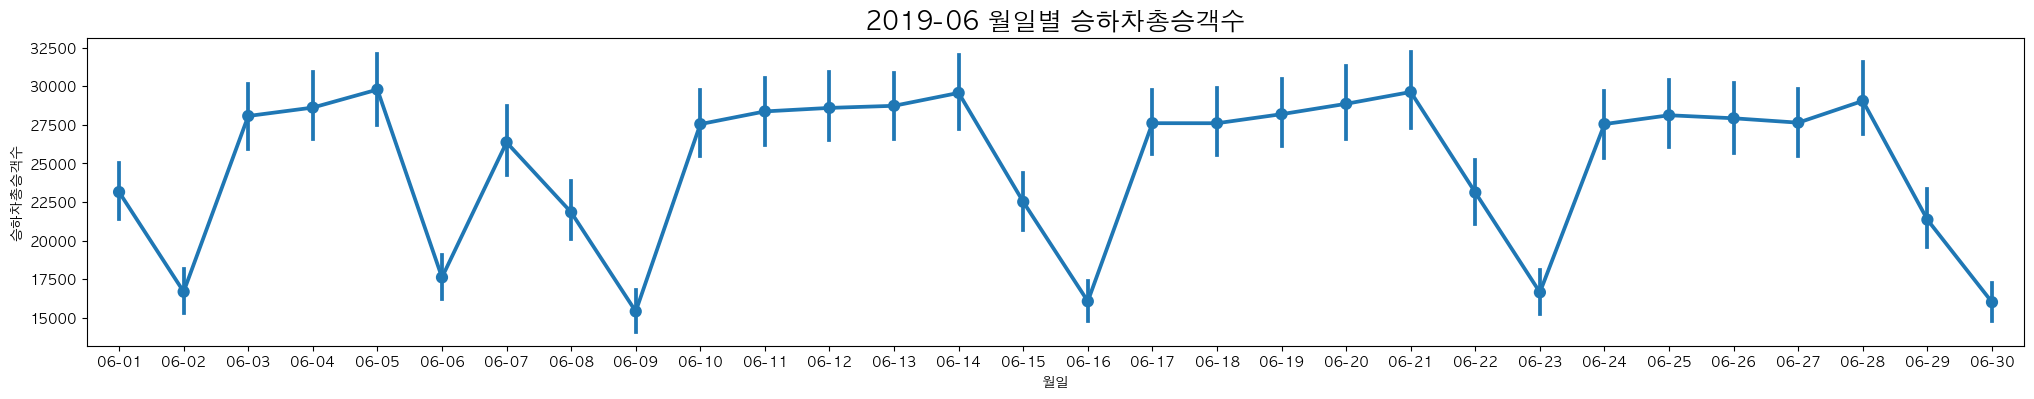

In [37]:
submonth6=sub[sub['연월']=='2019-06']
plt.figure(figsize=(25, 4)) 
plt.rcParams['font.family'] = 'AppleGothic'
plt.title("2019-06 월일별 승하차총승객수", fontsize=18)
sns.pointplot(x='월일', y='승하차총승객수', data=submonth6)

연월 각각에 대해 일자별 승하차 총 승객수 그래프 그려보았다. <br/>
그래프로 보았을때 주기적인 모양이 나온 것으로 보아 후에 예측 모델을 개발할때 이 부분을 이용할 수 있을 것 같다.

<AxesSubplot: title={'center': '역별 승차총승객수'}, ylabel='None,역명'>

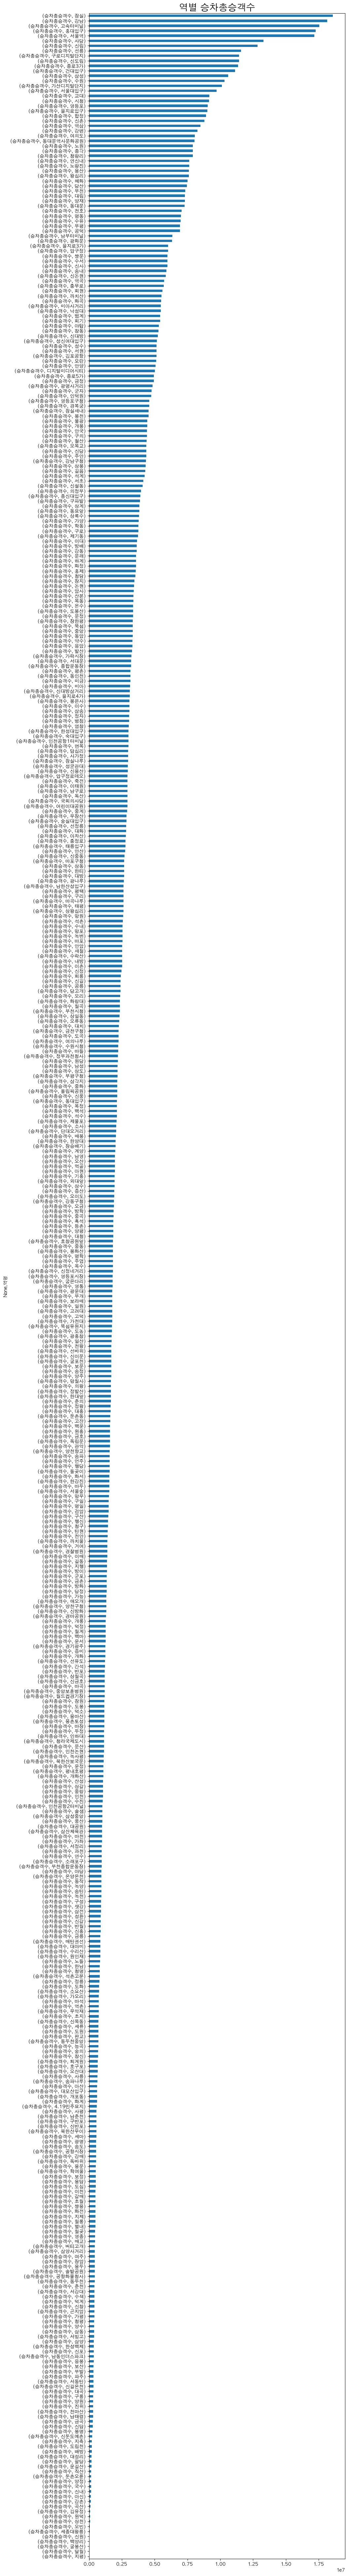

In [38]:
substa = sub.groupby('역명')[['승차총승객수']].sum()
substa=substa.sort_values(by='승차총승객수',ascending=True)
plt.figure(figsize=(10,100))
plt.rcParams['font.family'] = 'AppleGothic'
plt.title("역별 승차총승객수",fontsize=20)
substa.unstack(0).plot.barh()

---
'역명'으로 그룹핑하여, 승차총승객수의 합을 구했다. 그리고 승차총승객수를 기준으로 내림차순 정렬을 해줬다<br/>
이때 승차총승객수가 최대가 되는 역은 __'잠실'__이다.

___

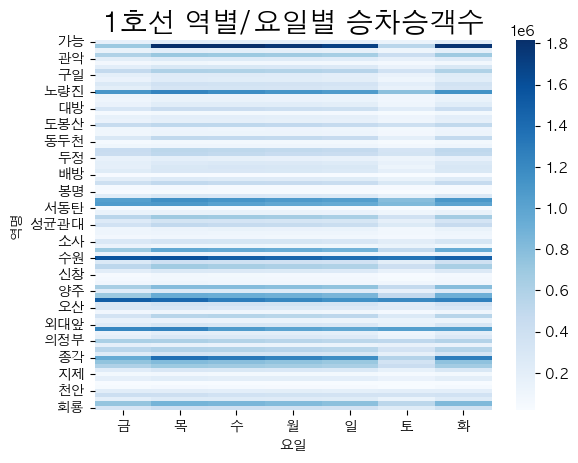

In [42]:
sub1=sub[sub['노선명']=='1호선']
df1 = sub1.groupby(['역명', '요일'])[['승차총승객수']].sum()
df1 = pd.pivot_table(data=df1, index='역명', columns='요일', values='승차총승객수', aggfunc='sum')
sns.heatmap(df1, cmap='Blues')
plt.title('1호선 역별/요일별 승차승객수', fontsize=20)
plt.show()

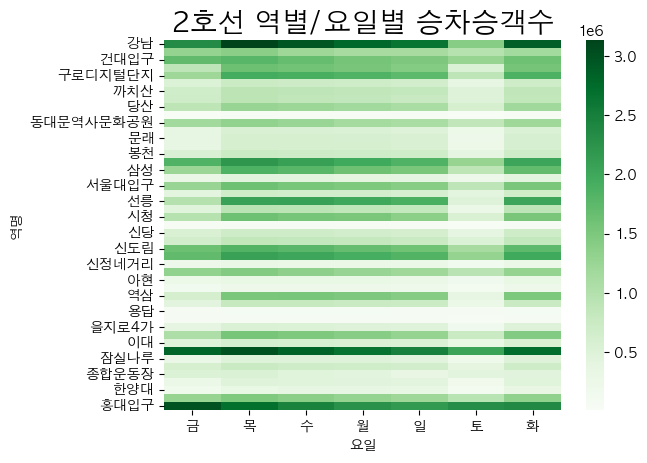

In [43]:
sub2 = sub[sub['노선명']=='2호선']
df2 = sub2.groupby(['역명', '요일'])[['승차총승객수']].sum()
df2 = pd.pivot_table(data=df2, index='역명', columns='요일', values='승차총승객수', aggfunc='sum')
ax=sns.heatmap(df2, cmap='Greens')
plt.title('2호선 역별/요일별 승차승객수', fontsize=20)
plt.show()

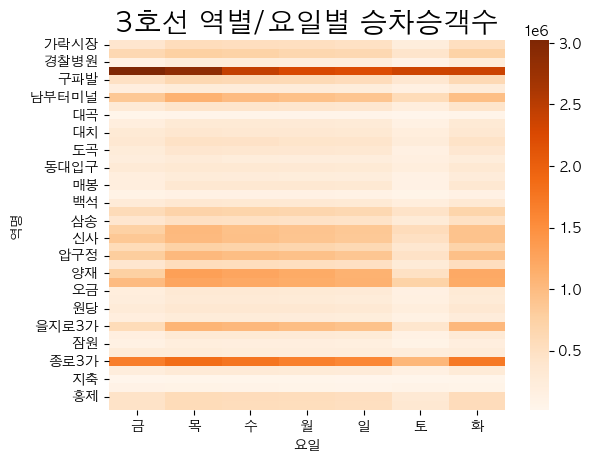

In [44]:
sub3 = sub[sub['노선명']=='3호선']
df3 = sub3.groupby(['역명', '요일'])[['승차총승객수']].sum()
df3 = pd.pivot_table(data=df3, index='역명', columns='요일', values='승차총승객수', aggfunc='sum')
ax=sns.heatmap(df3, cmap='Oranges')
plt.title('3호선 역별/요일별 승차승객수', fontsize=20)
plt.show()

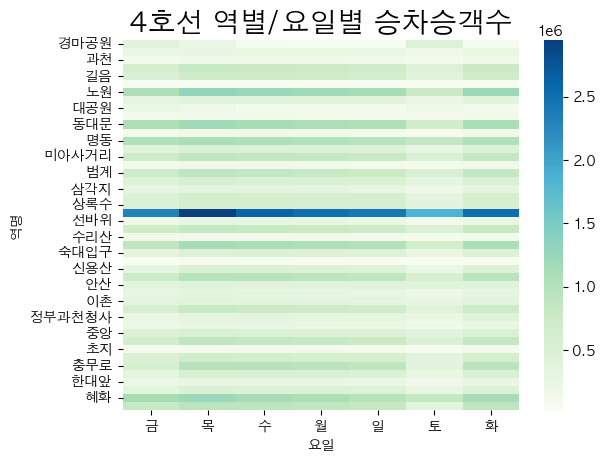

In [45]:
sub4 = sub[sub['노선명']=='4호선']
df4 = sub4.groupby(['역명', '요일'])[['승차총승객수']].sum()
df4 = pd.pivot_table(data=df4, index='역명', columns='요일', values='승차총승객수', aggfunc='sum')
ax=sns.heatmap(df4, cmap='GnBu')
plt.title('4호선 역별/요일별 승차승객수', fontsize=20)
plt.show()

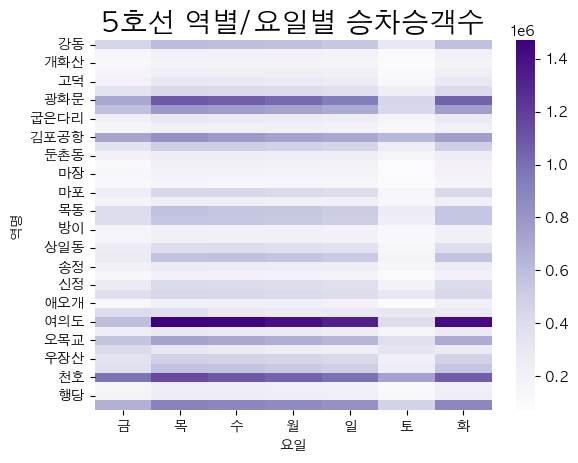

In [46]:
sub5 = sub[sub['노선명']=='5호선']
df5 = sub5.groupby(['역명', '요일'])[['승차총승객수']].sum()
df5 = pd.pivot_table(data=df5, index='역명', columns='요일', values='승차총승객수', aggfunc='sum')
ax=sns.heatmap(df5, cmap='Purples')
plt.title('5호선 역별/요일별 승차승객수', fontsize=20)
plt.show()

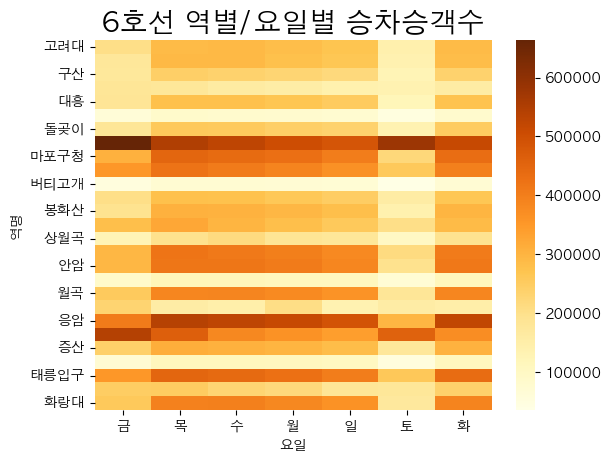

In [47]:
sub6 = sub[sub['노선명']=='6호선']
df6 = sub6.groupby(['역명', '요일'])[['승차총승객수']].sum()
df6 = pd.pivot_table(data=df6, index='역명', columns='요일', values='승차총승객수', aggfunc='sum')
ax=sns.heatmap(df6, cmap='YlOrBr')
plt.title('6호선 역별/요일별 승차승객수', fontsize=20)
plt.show()

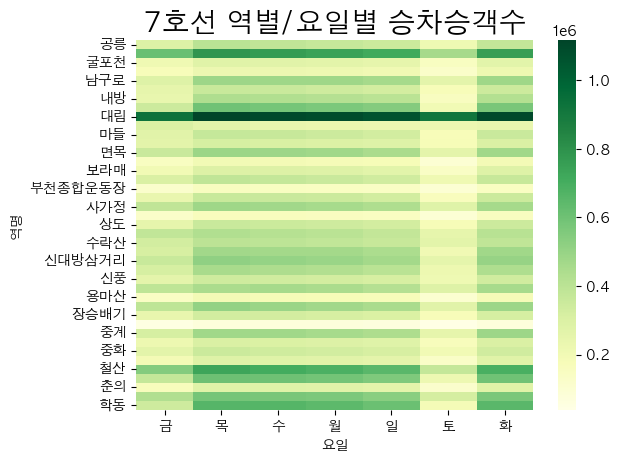

In [48]:
sub7 = sub[sub['노선명']=='7호선']
df7 = sub7.groupby(['역명', '요일'])[['승차총승객수']].sum()
df7 = pd.pivot_table(data=df7, index='역명', columns='요일', values='승차총승객수', aggfunc='sum')
ax=sns.heatmap(df7, cmap='YlGn')
plt.title('7호선 역별/요일별 승차승객수', fontsize=20)
plt.show()

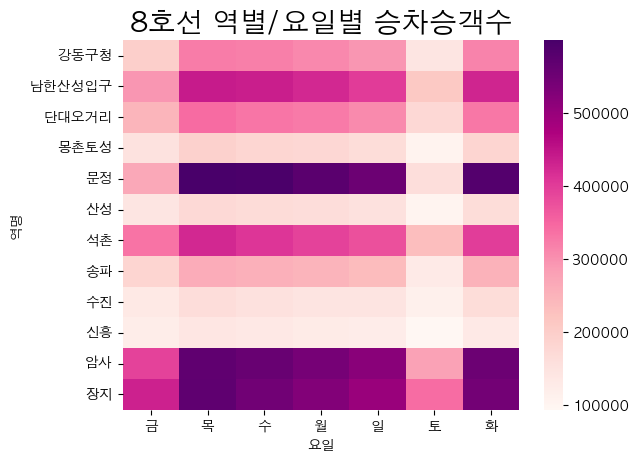

In [49]:
sub8 = sub[sub['노선명']=='8호선']
df8 = sub8.groupby(['역명', '요일'])[['승차총승객수']].sum()
df8 = pd.pivot_table(data=df8, index='역명', columns='요일', values='승차총승객수', aggfunc='sum')
ax=sns.heatmap(df8, cmap='RdPu')
plt.title('8호선 역별/요일별 승차승객수', fontsize=20)
plt.show()

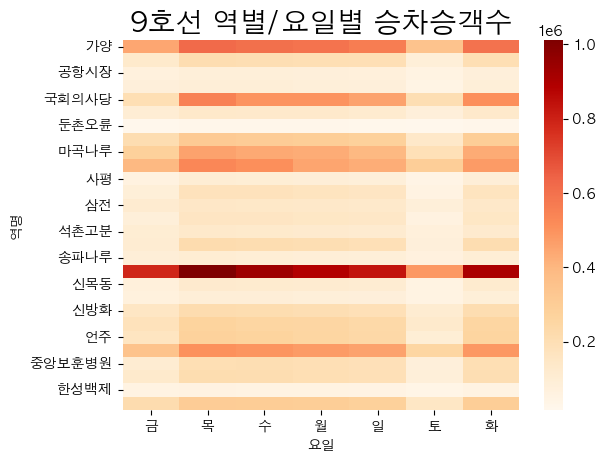

In [50]:
sub9 = sub[sub['노선명']=='9호선']
df9 = sub9.groupby(['역명', '요일'])[['승차총승객수']].sum()
df9 = pd.pivot_table(data=df9, index='역명', columns='요일', values='승차총승객수', aggfunc='sum')
ax=sns.heatmap(df9, cmap='OrRd')
plt.title('9호선 역별/요일별 승차승객수', fontsize=20)
plt.show()

노선별로 역별, 요일별 승차 승객수를 히트맵을 통해 비교해볼 수 있었다.